In [2]:
# import python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns



In [4]:
df = pd.read_csv('/content/Sales Data.csv', encoding= 'unicode_escape')


In [34]:
df.shape


(11251, 15)

In [35]:
df.head()


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [37]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)


In [38]:
pd.isnull(df).sum()


User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [39]:
df.dropna(inplace=True)


In [40]:
df['Amount'] = df['Amount'].astype('int')
df['Amount'].dtypes


dtype('int64')

In [41]:
df.describe()


,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [42]:
df[['Age', 'Orders', 'Amount']].describe()


,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


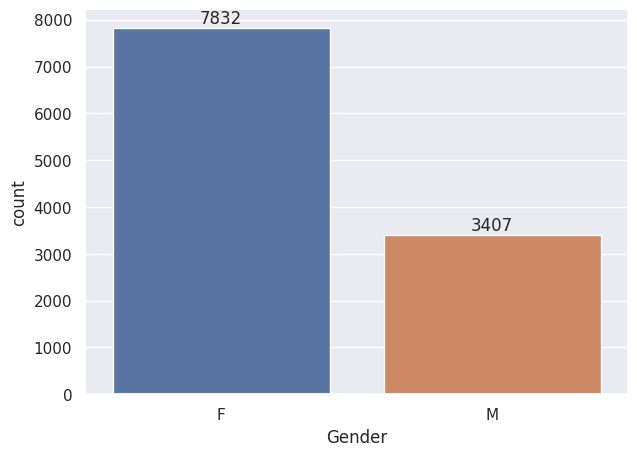

In [43]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

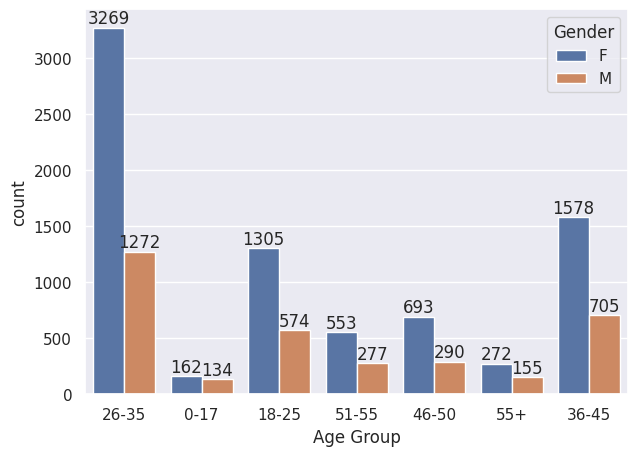

In [44]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

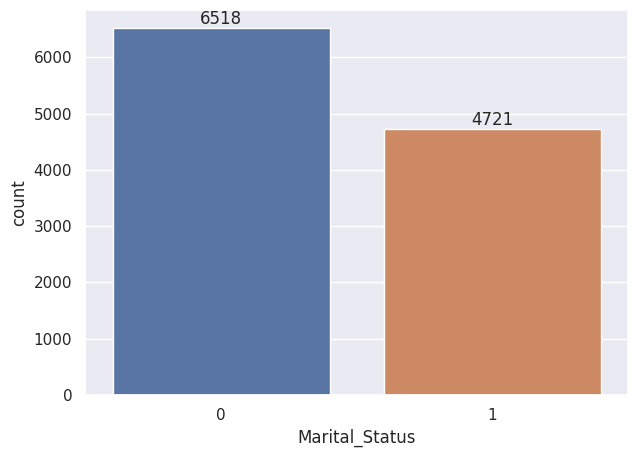

In [45]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_ID'>

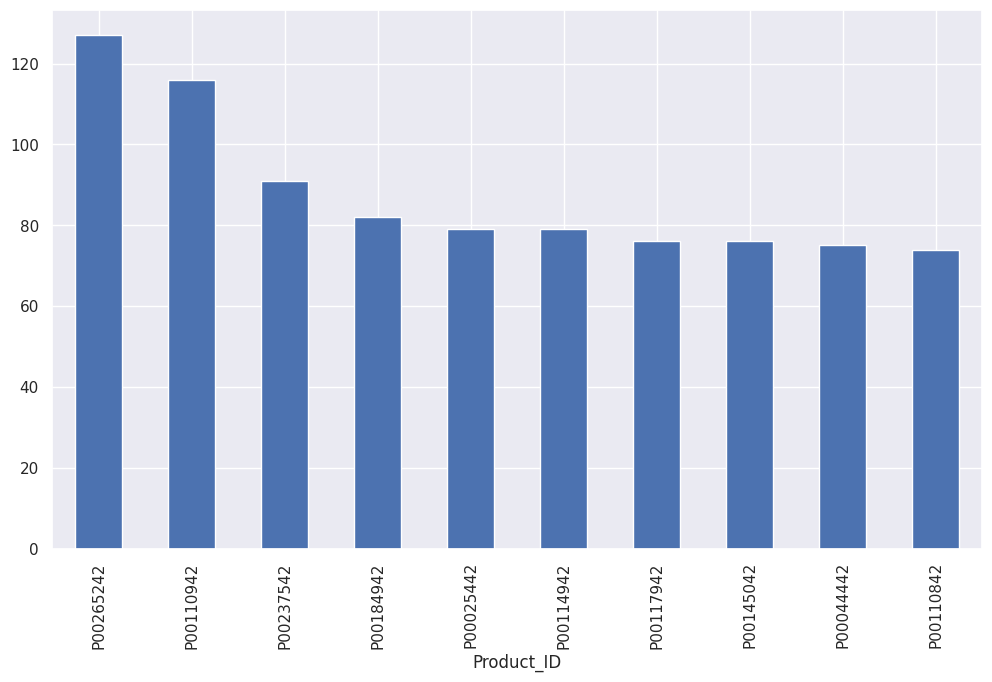

In [46]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

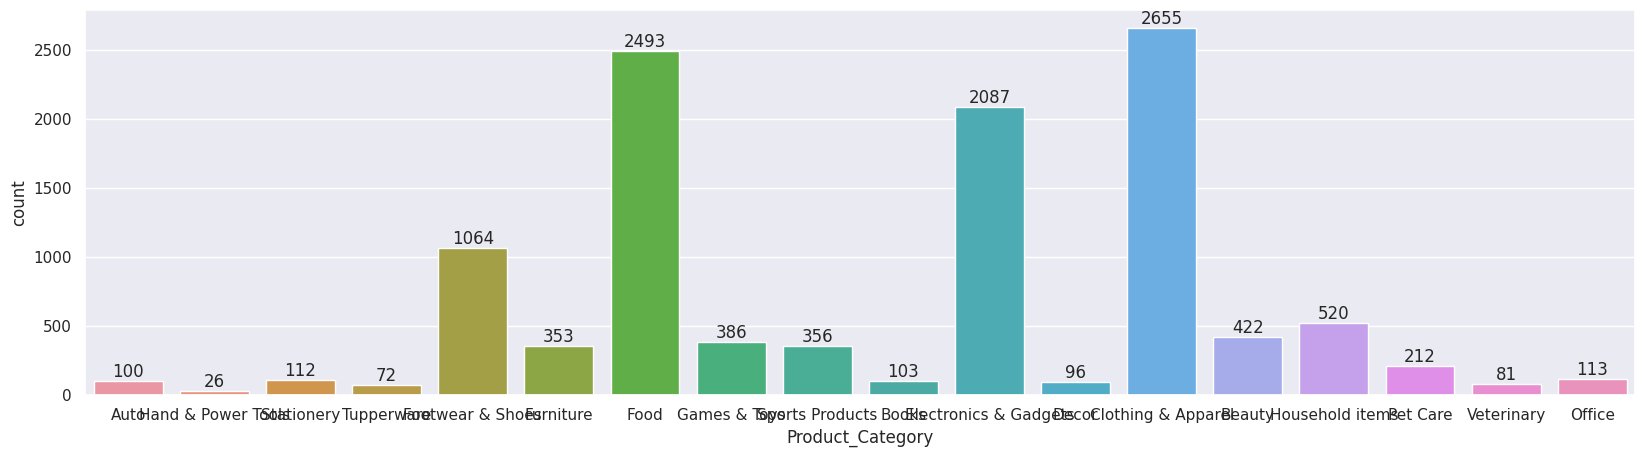

In [5]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)


In [47]:
encoder = LabelEncoder()
df['User_ID'] = encoder.fit_transform(df['User_ID'])
df['Cust_name'] = encoder.fit_transform(df['Cust_name'])
df['Product_ID'] = encoder.fit_transform(df['Product_ID'])
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Age Group'] = encoder.fit_transform(df['Age Group'])
df['Age'] = encoder.fit_transform(df['Age'])
df['Marital_Status'] = encoder.fit_transform(df['Marital_Status'])
df['State'] = encoder.fit_transform(df['State'])
df['Zone'] = encoder.fit_transform(df['Zone'])
df['Occupation'] = encoder.fit_transform(df['Occupation'])
df['Product_Category'] = encoder.fit_transform(df['Product_Category'])
df['Orders'] = encoder.fit_transform(df['Orders'])
df['Amount'] = encoder.fit_transform(df['Amount'])

In [48]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1780,991,774,0,2,16,0,10,4,8,0,0,6582
1,456,596,644,0,2,23,1,0,3,7,0,2,6581
2,1226,150,714,0,2,23,1,14,0,1,0,2,6580
3,890,1102,1507,1,0,4,0,7,3,5,0,1,6579
4,371,574,387,1,2,16,1,3,4,6,0,1,6578


In [49]:
X = df.drop(columns='Amount', axis=1)
Y = df['Amount']

In [50]:
X

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders
0,1780,991,774,0,2,16,0,10,4,8,0,0
1,456,596,644,0,2,23,1,0,3,7,0,2
2,1226,150,714,0,2,23,1,14,0,1,0,2
3,890,1102,1507,1,0,4,0,7,3,5,0,1
4,371,574,387,1,2,16,1,3,4,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11246,431,698,1888,1,1,7,1,10,4,4,12,3
11247,2536,938,1039,1,2,21,0,4,2,8,17,2
11248,749,844,1263,0,3,28,0,9,0,14,12,3
11249,2494,817,396,1,3,25,0,7,3,0,12,2


In [51]:
Y

0        6582
1        6581
2        6580
3        6579
4        6578
         ... 
11246       4
11247       3
11248       2
11249       1
11250       0
Name: Amount, Length: 11239, dtype: int64

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(11239, 12) (8991, 12) (2248, 12)


In [53]:
regressor = XGBRegressor()
regressor.fit(X_train, Y_train)
# prediction on training data
training_data_prediction = regressor.predict(X_train)
mse = mean_squared_error(Y_train,training_data_prediction)
print("MSE of Training =",sqrt(mse))
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
# prediction on test data
test_data_prediction = regressor.predict(X_test)
'''mse2 = mean_squared_error(Y_test,training_data_prediction)'''
'''print("MSE of test =",mse2)'''
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R Squared value = ', r2_train)
print('R Squared value = ', r2_test)


MSE of Training = 678.2110100390422
R Squared value =  0.8502129537345279
R Squared value =  0.6308625373724377


<Axes: >

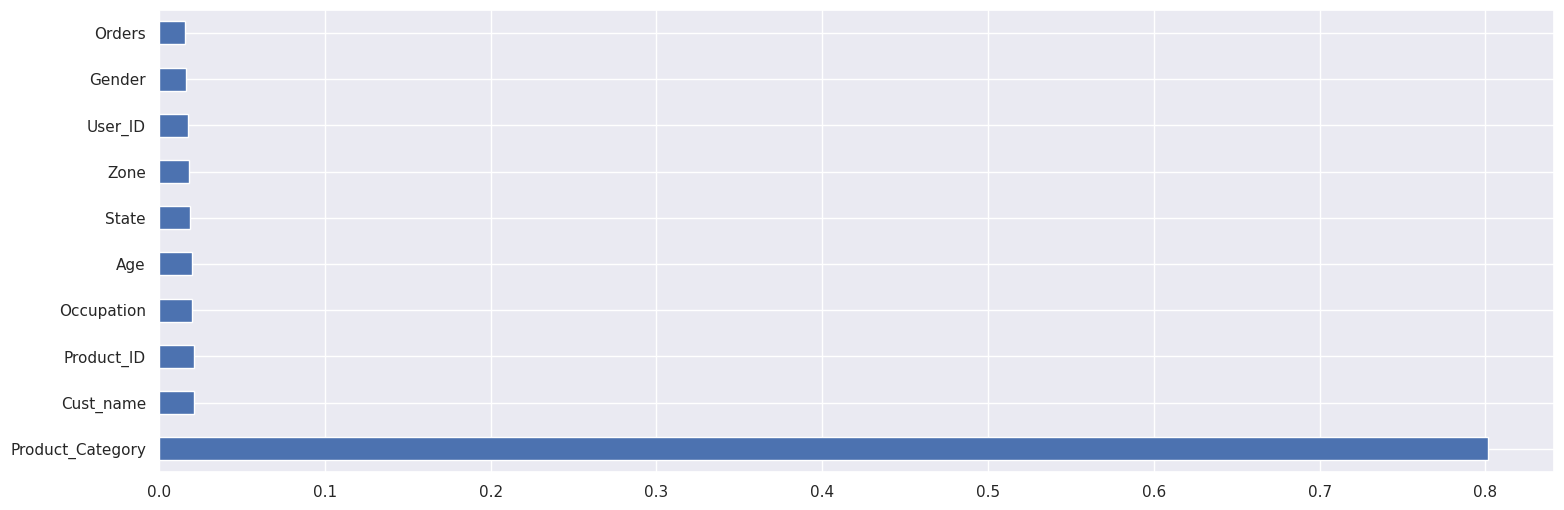

In [54]:
importance = pd.Series(regressor.feature_importances_)
importance.index = X_train.columns
importance.sort_values(inplace=True, ascending=False)
importance.head(10).plot.barh(figsize=(18,6))

In [55]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
rf_model = RandomForestRegressor()
rf_model.fit(X_train, Y_train)

pred = rf_model.predict(X_train)
r2_train = metrics.r2_score(Y_train, pred)
print('rf train mse: {}'.format(sqrt(mean_squared_error(Y_train, pred))))


pred = rf_model.predict(X_test)
r2_test = metrics.r2_score(Y_test, pred)

print('rf test mse: {}'.format(sqrt(mean_squared_error(Y_test, pred))))
print('R Squared value = ', r2_train)
print('R Squared value = ', r2_test)


rf train mse: 398.2240153813258
rf test mse: 1041.4126363641003
R Squared value =  0.9483584249754693
R Squared value =  0.6480686429315654


<Axes: >

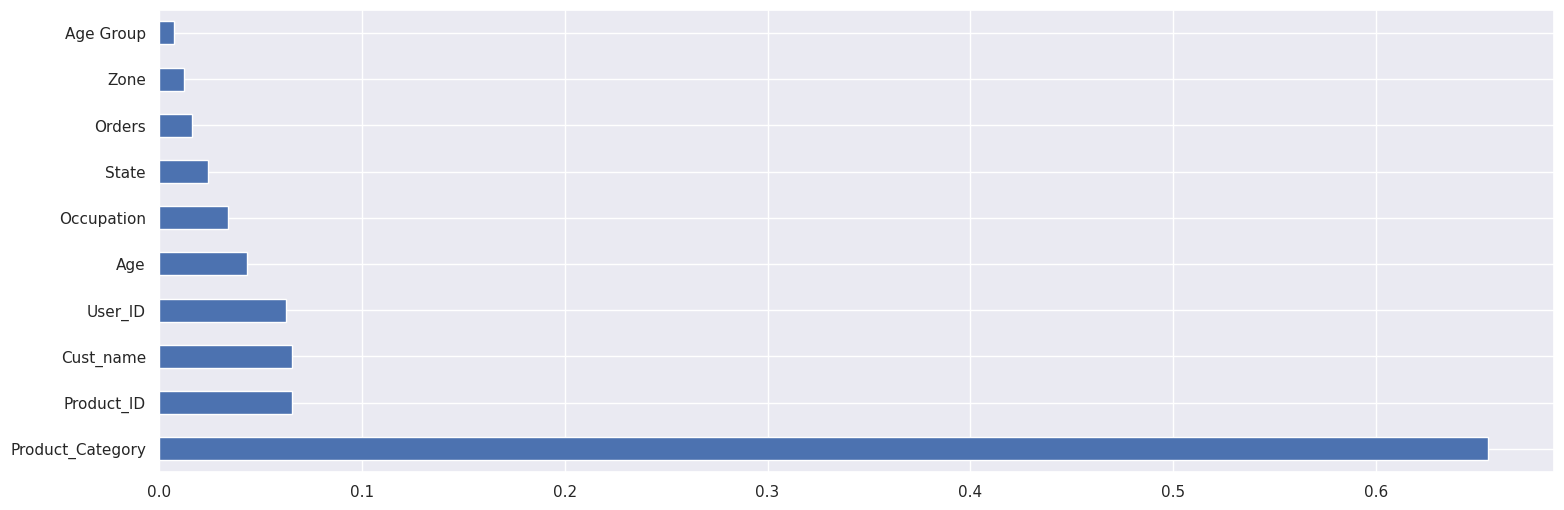

In [56]:
importance = pd.Series(rf_model.feature_importances_)
importance.index = X_train.columns
importance.sort_values(inplace=True, ascending=False)
importance.head(10).plot.barh(figsize=(18,6))

In [57]:
lr = LinearRegression()
model = lr.fit(X_train,Y_train)
predictions = lr.predict(X_test)
lr.score(X_test, Y_test)


0.00590116180162048

In [58]:
lr.intercept_

2836.387911436685

In [59]:
predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(Y_train,predictions)))
r2_train = metrics.r2_score(Y_train, predictions)
print('R Squared value = ', r2_train)

1741.3686401388845
R Squared value =  0.012525195608860562


In [60]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, Y_train)
# prediction on training data
training_data_prediction = decision_tree_model.predict(X_train)
mse = mean_squared_error(Y_train,training_data_prediction)
print("MSE of Training =",sqrt(mse))
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
# prediction on test data
test_data_prediction = decision_tree_model.predict(X_test)
'''mse2 = mean_squared_error(Y_test,training_data_prediction)'''
'''print("MSE of test =",mse2)'''
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R Squared value = ', r2_train)
print('R Squared value = ', r2_test)



MSE of Training = 0.0
R Squared value =  1.0
R Squared value =  0.25254812975159857
